# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# importing my df. 
df_prods_ords_customer = pd.read_pickle(r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS\Data\Prepared Data\df_prods_ords_customer.pkl')

In [13]:
df_prods = pd.read_csv(r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS\Data\Prepared Data\orders_wrangled.csv')

##. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis
The first_name' and 'last_name' columns within our dataset could potentially be traced back to a particular person and needs to be addressed, therefore dropping these two columns in compliance to customer privacy and updating a senior colleague while we send a reports concerning the privacy issue in the data sets to stakeholders is the best way to address it.

In [15]:
# confirming the drop columns withh PII information was dropped in the previous exercise.
df_prods_ords_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,spending_flag,order_freq,order_freq_flag,Gender,State,Age,date_joined,Number_Of_Dependents,Family_Status,income
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,High spender,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620


#. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.

In [17]:
# checking if there is any missing values or mixed data types in the state column.
df_prods_ords_customer['State'].value_counts(dropna = False)

Arizona                 41628
North Carolina          41569
Pennsylvania            41341
California              41212
Rhode Island            41135
New Mexico              40983
Oklahoma                40731
Massachusetts           40670
Wyoming                 40580
Colorado                40547
Texas                   40364
Delaware                40321
Georgia                 40287
Maine                   40285
Minnesota               40195
North Dakota            40172
New York                40125
Louisiana               40066
South Dakota            40036
Montana                 40032
Hawaii                  40017
Virginia                39991
Maryland                39917
Indiana                 39687
Missouri                39686
Wisconsin               39659
Washington              39620
Nebraska                39593
Kansas                  39580
Nevada                  39551
Alabama                 39545
Iowa                    39532
Alaska                  39450
Kentucky  

In [18]:
# defining region list
region_1_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [19]:
# defining region list
region_2_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [20]:
# defining region list
region_3_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [21]:
# defining region list
region_4_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [22]:
# Creating region coluumn and assigning the column defined list of states as defined above
df_prods_ords_customer.loc[df_prods_ords_customer['State'].isin(region_1_NE), 'region'] = 'Northeast'

In [23]:
# Creating region coluumn and assigning the column defined list of states as defined above
df_prods_ords_customer.loc[df_prods_ords_customer['State'].isin(region_2_MW), 'region'] = 'Midwest'

In [24]:
# Creating region coluumn and assigning the column defined list of states as defined above
df_prods_ords_customer.loc[df_prods_ords_customer['State'].isin(region_3_S), 'region'] = 'South'

In [26]:
# Creating region coluumn and assigning the column defined list of states as defined above
df_prods_ords_customer.loc[df_prods_ords_customer['State'].isin(region_4_W), 'region'] = 'West'

In [27]:
df_prods_ords_customer['region'].value_counts(dropna = False)

South        673681
West         520120
Midwest      475144
Northeast    358289
Name: region, dtype: int64

In [28]:
df_prods_ords_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,order_freq,order_freq_flag,Gender,State,Age,date_joined,Number_Of_Dependents,Family_Status,income,region
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,8.0,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest


In [29]:
df_prods_ords_customer.shape

(2027234, 33)

###. 3.2 Spending habits of Instacart customers within the U.S. regions

In [30]:
# Creating a spending_habits crosstab
crosstab_spending_habits = pd.crosstab (df_prods_ords_customer['spending_flag'], df_prods_ords_customer['region'], dropna = False)

In [32]:
crosstab_spending_habits.to_clipboard()

##. 4. Creating an exclusion flag for low-activity customers (with less than 5 orders)

In [33]:
# Creating an exclusion flag for customer with max order of < 5
df_prods_ords_customer.loc[df_prods_ords_customer['max_order'] <5, 'activity_flag'] = 'Low activity'

In [34]:
# # Creating an exclusion flag for customer with max order of >= 5 
df_prods_ords_customer.loc[df_prods_ords_customer['max_order'] >=5, 'activity_flag'] = 'High activity'

In [35]:
# Checking new added column activity flag
df_prods_ords_customer['activity_flag'].value_counts(dropna = False)

High activity    1908824
Low activity       91176
NaN                27234
Name: activity_flag, dtype: int64

##. 4.1 Excluding Low Activity customers from the data and export the subset.
First Creatng a subset which excludes low_activity customers

In [36]:
high_activity_customer = df_prods_ords_customer[df_prods_ords_customer['activity_flag'] == 'High activity']

In [37]:
high_activity_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,order_freq_flag,Gender,State,Age,date_joined,Number_Of_Dependents,Family_Status,income,region,activity_flag
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity


#. Exporting my high_activity_customer as pickle file into my prepare data folder as .pkl

In [38]:
path = r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS'

In [39]:
path

'C:\\Users\\Babafemi Olayinka\\Jupyter Notebook\\FEB-2023 INSTACART BASKET ANALYSIS'

In [40]:
# Exported my high_activity_customer
high_activity_customer.to_pickle(os.path.join(path, 'Data','Prepared Data', 'high_activity_customer.pkl'))

##. 4.2 Excluding high-activity customers from the data and export the subset
First Creatng a subset which excludes high_activity customers

In [41]:
low_activity_customer = df_prods_ords_customer[df_prods_ords_customer['activity_flag'] == 'low activity']

##. Exporting my low_activity_customer as pickle file into my prepare data folder as .pkl

In [42]:
# Exported my low_activity_customer
low_activity_customer.to_pickle(os.path.join(path, 'Data','Prepared Data', 'low_activity_customer.pkl'))

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

##. 5.1. Segmentation based on INSTACART customer's age.
N/B : We will be using 'high_activity_cxs' dataset to profile customers, since the Instacart CFO isn’t interested in customers who don’t generate much revenue for the app (low_activity_customer).

In [43]:
high_activity_customer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,order_freq_flag,Gender,State,Age,date_joined,Number_Of_Dependents,Family_Status,income,region,activity_flag
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity


In [44]:
# rewriting my high_activity_customer as Ncustome. Number of customers the Business strategy dept is working with.
Ncustomer = high_activity_customer

In [46]:
Ncustomer['Age'].describe()

count    1.908824e+06
mean     4.946433e+01
std      1.850839e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

##. Result:  The output of describe() function shows that 18 is the youngest age while age 81 is the oldest and the median age is 49 within the data. Therefore to complete the profiling, we can as well grouped the ages as :
Age >=18 but < 40 as Youth
Age >=40 and <65 as Middle
Age >=65 as Older.

# Creating the above age categorization

In [47]:
Ncustomer.loc[(Ncustomer['Age'] >= 18) & (Ncustomer['Age'] < 40), 'Age_category'] = 'Youth'

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\1976962421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer.loc[(Ncustomer['Age'] >= 18) & (Ncustomer['Age'] < 40), 'Age_category'] = 'Youth'


In [49]:
Ncustomer.loc[(Ncustomer['Age'] >= 40) & (Ncustomer['Age'] < 65), 'Age_category'] = 'Middle'

In [50]:
Ncustomer.loc[Ncustomer['Age'] >= 65, 'Age_category'] = 'Older'

In [51]:
# checking the frequency of my new column
Ncustomer['Age_category'].value_counts()

Middle    747399
Youth     656444
Older     504981
Name: Age_category, dtype: int64

In [52]:
# checking the dimension of my Ncustomers
Ncustomer.shape

(1908824, 35)

In [53]:
# checking to confirm my new column Age_category exist in my dataset
Ncustomer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,Gender,State,Age,date_joined,Number_Of_Dependents,Family_Status,income,region,activity_flag,Age_category
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Older
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Older
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Older
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Older
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,Male,Minnesota,81,8/1/2019,1,married,49620,Midwest,High activity,Older


# 5.1.2 Segmentation based on INSTACART customer's number of dependents & relationship

In [54]:
# Exploring 'no_of_dependents'
Ncustomer['Number_Of_Dependents'].describe()

count    1.908824e+06
mean     1.500145e+00
std      1.119188e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: Number_Of_Dependents, dtype: float64

##. Result:  The output of describe() function on 'nNumber_Of_Dependents' shows that 0 is the min while 3 is the largest number of dependents in a family.
Therefore, family size groups will be calssifed as:
     a) Small  = 0  
     b) Mid size = 1 to 2   
     c) Large  = > 2

In [55]:
Ncustomer.loc[Ncustomer['Number_Of_Dependents'] == 0, 'family_size'] = 'Small'

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\2677247429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer.loc[Ncustomer['Number_Of_Dependents'] == 0, 'family_size'] = 'Small'


In [56]:
Ncustomer.loc[(Ncustomer['Number_Of_Dependents'] == 1) | (Ncustomer['Number_Of_Dependents'] == 2), 'family_size'] = 'Mid size'

In [57]:
Ncustomer.loc[Ncustomer['Number_Of_Dependents'] > 2, 'family_size'] = 'Large'

In [59]:
# checking the frequency of my new column family size
Ncustomer['family_size'].value_counts(dropna = False)

Mid size    951948
Small       478695
Large       478181
Name: family_size, dtype: int64

In [61]:
# Exploring the connection of 'family_status' and 'no_of_dependents' by creating a family_status vs no_of_dependents crosstab
family_crosstab = pd.crosstab(Ncustomer['Family_Status'],Ncustomer['Number_Of_Dependents'],dropna = False)

In [63]:
family_crosstab.to_clipboard()

# Thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”
First, create household column to differentiate different types of househld, using the two variables Family_status and Number_Of_Dependents

In [64]:
Ncustomer.loc[(Ncustomer['Family_Status'] == 'married') & (Ncustomer['Number_Of_Dependents'] == 1), 'household'] = 'Couple without children'

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\585246770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer.loc[(Ncustomer['Family_Status'] == 'married') & (Ncustomer['Number_Of_Dependents'] == 1), 'household'] = 'Couple without children'


In [65]:
Ncustomer.loc[(Ncustomer['Family_Status'] == 'married') & (Ncustomer['Number_Of_Dependents'] >= 2), 'household'] = 'Couple with children'

In [66]:
Ncustomer.loc[(Ncustomer['Family_Status'] == 'divorced/widowed') | (Ncustomer['Number_Of_Dependents'] == 'single'), 'household'] = 'One person'

In [67]:
Ncustomer.loc[(Ncustomer['Family_Status'] == 'divorced/widowed') & (Ncustomer['Number_Of_Dependents'] > 0 ), 'household'] = 'Single parent'

In [68]:
Ncustomer.loc[Ncustomer['Family_Status'] == 'living with parents and siblings', 'household'] = 'Other family'

In [69]:
# checking the frequency of my new column houshold
Ncustomer['household'].value_counts(dropna = False)

Couple with children       895133
Couple without children    442819
NaN                        315340
One person                 163355
Other family                92177
Name: household, dtype: int64

In [70]:
Ncustomer.shape

(1908824, 37)

# 5.1.3 Segmentation by INSTACART customer's income

In [71]:
# checkig the descriptive statistics IC customer's income
Ncustomer['income'].describe()

count    1.908824e+06
mean     9.991009e+04
std      4.437176e+04
min      2.590300e+04
25%      6.704800e+04
50%      9.675500e+04
75%      1.284000e+05
max      5.939010e+05
Name: income, dtype: float64

##.  The reuslt shows that the maximum income is  593.9010, while the min income is 25,903. The mean income is 99,910. Therefore, income catrgories will be calssifed as
    Low         < 50K 
    Middle      50K- 100K
    Upper mid   100k-150k
    High        > 150K.
    # Creating income_category column

In [72]:
# Creating income_category column
Ncustomer.loc[Ncustomer['income']< 50000, 'income_category'] = 'Low'

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\2768102031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer.loc[Ncustomer['income']< 50000, 'income_category'] = 'Low'


In [73]:
# Creating income_category column
Ncustomer.loc[(Ncustomer['income']>= 50000) & (Ncustomer['income']< 100000), 'income_category'] = 'Middle'

In [74]:
# Creating income_category column
Ncustomer.loc[(Ncustomer['income']>= 100000) & (Ncustomer['income']< 150000), 'income_category'] = 'Upper mid'

In [75]:
# Creating income_category column
Ncustomer.loc[Ncustomer['income']>= 150000, 'income_category'] = 'High'

In [76]:
# checking the frequency of my new column houshold
Ncustomer['income_category'].value_counts(dropna = False)

Middle       818418
Upper mid    632430
High         243875
Low          214101
Name: income_category, dtype: int64

## 5.1.4 Segmentation by department
since we don't have the department names in 'Ncustomer' dataset, we need to use 'department' dataframe to map 'depatment_id's to department names.

In [77]:
# importing data set departments.csv
df_dep = pd.read_csv(r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS\Data\Original Data\departments.csv' , index_col = False)

In [78]:
df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [80]:
#  Transposing the df_dep 
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [81]:
# overwriting the old df_dep with the new df_deptment
df_deptment = df_dep.T

In [82]:
df_deptment.shape

(22, 1)

In [83]:
# giving a new index column to your new dept df_deptment
df_deptment.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [84]:
# take the first row 0 of df_deptment for the header
new_header = df_deptment.iloc[0]

In [85]:
# Take the data under the header row for a new df
df_deptment_1 = df_deptment[1:]

In [86]:
df_deptment_1

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [87]:
# set the columns name in the new_header as the header for the new df
df_deptment_1.columns = new_header

In [88]:
df_deptment_1.columns

Index(['department'], dtype='object', name='department_id')

In [89]:
# confirming my new df_deptment_1 has a succinct header
df_deptment_1

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [90]:
# turning my df_deptment_1 df into a data dictonary and saving it as another name
data_dict = df_deptment_1.to_dict('index')

In [91]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [92]:
df_deptment_1

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [94]:
# Mapping Ncustomers to department df by the map() function and department dictionary(data_dict)
Ncustomer['department'] = Ncustomer['department_id'].map(data_dict)

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\3430087795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer['department'] = Ncustomer['department_id'].map(data_dict)


In [95]:
Ncustomer.shape

(1908824, 39)

In [96]:
# checking if the new department column was added
Ncustomer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,Number_Of_Dependents,Family_Status,income,region,activity_flag,Age_category,family_size,household,income_category,department
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,1,married,49620,Midwest,High activity,Older,Mid size,Couple without children,Low,NaN
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,1,married,49620,Midwest,High activity,Older,Mid size,Couple without children,Low,NaN
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,1,married,49620,Midwest,High activity,Older,Mid size,Couple without children,Low,NaN
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,1,married,49620,Midwest,High activity,Older,Mid size,Couple without children,Low,NaN
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,1,married,49620,Midwest,High activity,Older,Mid size,Couple without children,Low,NaN


In [97]:
# checking the frequency
Ncustomer['department'].value_counts(dropna = False)

NaN    1908824
Name: department, dtype: int64

# 5.2 Behavoiral market segmentation
Non-Alocohol drinker Customers and Creating alcohol_drinker column; Parents with babies

In [98]:
Ncustomer.loc[Ncustomer['department'] !='alcohol', 'alcohol_drinker'] = 'No'

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\2840701371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer.loc[Ncustomer['department'] !='alcohol', 'alcohol_drinker'] = 'No'


In [100]:
Ncustomer.loc[Ncustomer['department'] =='alcohol', 'alcohol_drinker'] = 'Yes'

In [101]:
Ncustomer['alcohol_drinker'].value_counts(dropna = False)

No    1908824
Name: alcohol_drinker, dtype: int64

In [102]:
# checking the dimension
Ncustomer.shape

(1908824, 40)

In [103]:
# Creating 'parents_with_baby' column based on department
Ncustomer.loc[Ncustomer['department'] !='babies', 'parents_with_baby'] = 'No'

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\1816359153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer.loc[Ncustomer['department'] !='babies', 'parents_with_baby'] = 'No'


In [104]:
Ncustomer.loc[Ncustomer['department'] =='babies', 'parents_with_baby'] = 'Yes'

In [105]:
Ncustomer['parents_with_baby'].value_counts(dropna = False)

No    1908824
Name: parents_with_baby, dtype: int64

In [106]:
# checking the dimension
Ncustomer.shape

(1908824, 41)

# Create an appropriate visualization to show the distribution of profiles

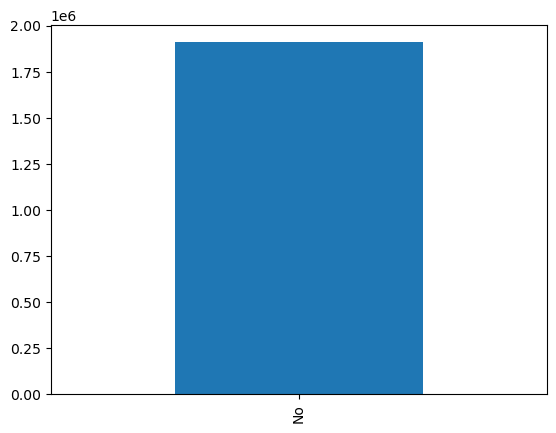

In [107]:
# Drawing a bar chart for alcohol drinking profiling
bar_alcohol_drinkers = Ncustomer['alcohol_drinker'].value_counts().sort_index().plot.bar()

In [127]:
# exporting bar chart as .png
bar_alcohol_drinkers.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'bar_alcohol_drinkers.png'))

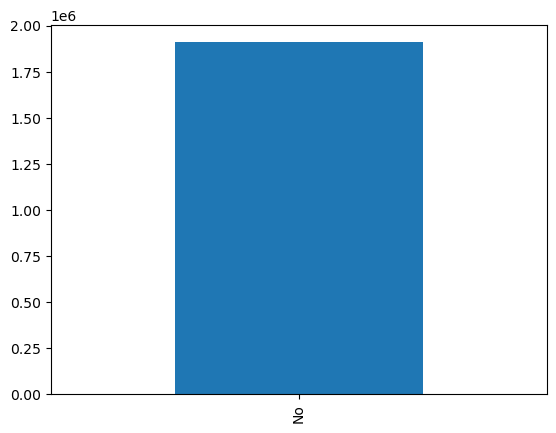

In [108]:
# Drawing a bar chart for parents_with_baby profiling
bar_parents_with_baby = Ncustomer['parents_with_baby'].value_counts().sort_index().plot.bar()

In [128]:
# exporting bar charts parents-with_baby
bar_parents_with_baby.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'bar_parents_with_baby.png'))

In [121]:
# using my result [] to assign value within the column.

Departments = []

for value in Ncustomer["department_id"]:
  if value == 20 or value == 15:
    Departments.append("Deli foods")
  elif value == 14 or value == 19:
    Departments.append("Breakfast")
  else:
    Departments.append("Other products")

In [111]:
# running your new column 'Departments' which shows how it has loop all thru the rows in that new column
Departments

['Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Deli foods',
 'Deli foods',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 

In [122]:
# combine the 'column Departments' with your df 'Ncustomer'
Ncustomer['Deli foods'] = Departments

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\3869345281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer['Deli foods'] = Departments


In [123]:
# Then make a count , so as to the see the summarized values meaning the frequency count
Ncustomer['Deli foods'].value_counts(dropna = False)

Other products    1538931
Breakfast          211325
Deli foods         158568
Name: Deli foods, dtype: int64

In [124]:
Departments

['Breakfast',
 'Breakfast',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Breakfast',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Breakfast',
 'Other products',
 'Other products',
 'Deli foods',
 'Deli foods',
 'Breakfast',
 'Other products',
 'Other products',
 'Other products',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Other products',
 'Other products',
 'Breakfast',
 'Other products',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Breakfast',
 'Breakfast',
 'Breakfast',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other products',
 'Other pr

In [168]:
# renaming my column Deli foods to Products type
Ncustomer.rename(columns = {'Product type' : 'Foods'}, inplace = True)

C:\Users\Babafemi Olayinka\AppData\Local\Temp\ipykernel_14744\2604058545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ncustomer.rename(columns = {'Product type' : 'Foods'}, inplace = True)


In [126]:
# exporting bar chart product types as .png
bar_Ncustomer.figure.savefig(os.path.join(path, 'Analysis','Visuals', 'bar_orders_Products type.png'))

In [170]:
Ncustomer.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_dow,order_hour_of_day,...,activity_flag,Age_category,family_size,household,income_category,department,alcohol_drinker,parents_with_baby,Products type,Products type
0,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,3139998.0,138,28.0,6.0,11.0,...,High activity,Older,Mid size,Couple without children,Low,NaN,No,No,Other products,Breakfast
1,1.0,Chocolate Sandwich Cookies,61.0,19.0,5.8,1977647.0,138,30.0,6.0,17.0,...,High activity,Older,Mid size,Couple without children,Low,NaN,No,No,Other products,Breakfast
2,907.0,Premium Sliced Bacon,106.0,12.0,20.0,3160996.0,138,1.0,5.0,13.0,...,High activity,Older,Mid size,Couple without children,Low,NaN,No,No,Other products,Other products
3,907.0,Premium Sliced Bacon,106.0,12.0,20.0,2254091.0,138,10.0,5.0,14.0,...,High activity,Older,Mid size,Couple without children,Low,NaN,No,No,Other products,Other products
4,1000.0,Apricots,18.0,10.0,12.9,505689.0,138,9.0,6.0,12.0,...,High activity,Older,Mid size,Couple without children,Low,NaN,No,No,Other products,Other products


##. The outputs shows that customer maake more orders related to Deli Foods products than Breakfast products, while the other products type falls under other products and it show it has the larger order among all product types.
The alcohol_drinkers chart shows that all the customers in my dataset are non-alcohol drinkers. Same thing with the paarents_with_baby charts, it shows all cutomer has ordered in the department that has no product type 'babies'.

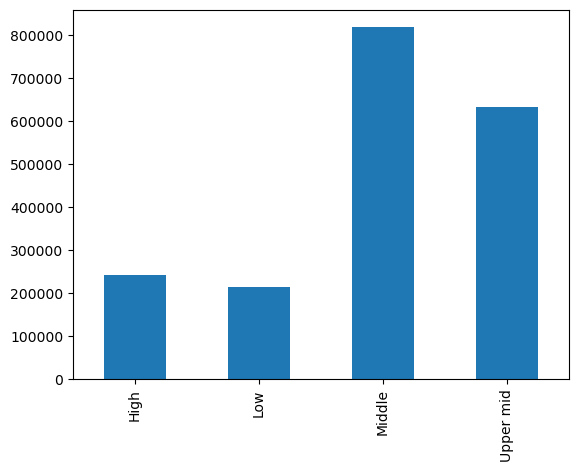

In [132]:
# exporting bar chart income category as .png
bar_Ncustomer_income_cat = Ncustomer['income_category'].value_counts().sort_index().plot.bar()

##. The charts shows that there are more middle income earners in my datasets and upper middle income earners than the high and 
low income earners.

In [147]:
# Drawing a stacked-bar chart of 'income_category' column in different regions
crosstab_income_region = pd.crosstab (Ncustomer['region'],Ncustomer['income_category'], dropna = False)

In [149]:
crosstab_income_region.to_clipboard()

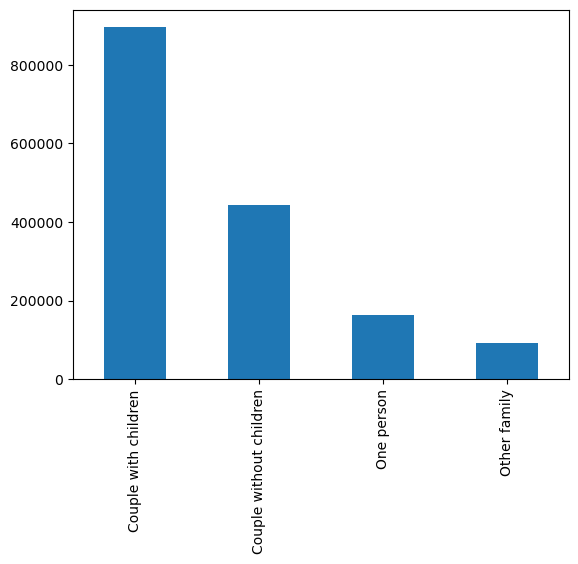

In [131]:
# exporting bar chart household category as .png
bar_Ncustomer_household = Ncustomer['household'].value_counts().sort_index().plot.bar()

In [152]:
# Drawing a stacked-bar chart of 'household' column in different income category
crosstab_household_income = pd.crosstab (Ncustomer['household'],Ncustomer['income_category'], dropna = False)

In [153]:
crosstab_household_income.to_clipboard()

In [155]:
# Drawing a stacked-bar chart of 'household' column in different regions
crosstab_household_region = pd.crosstab (Ncustomer['household'],Ncustomer['region'], dropna = False)

In [156]:
crosstab_household_region.to_clipboard()

##. The charts shows that there are more 'couple with children' than any other household type in my datasets. Then followed by 'couple without children' which can also represent young parents in my datasets. While 'one person' which may represent single adult and 'other family' kind of household are not as many as compared to the young parents type of houshold.

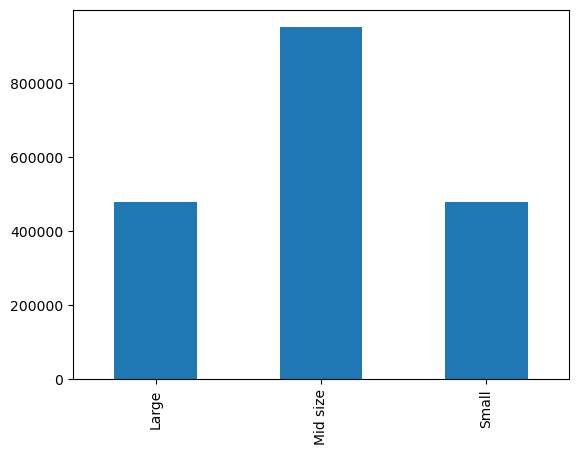

In [140]:
# exporting bar chart family_size as .png
bar_Ncustomer_family_size = Ncustomer['family_size'].value_counts().sort_index().plot.bar()

##. The chart shows there are more 'mid size' family size in my datasets compare to the large and small family size.

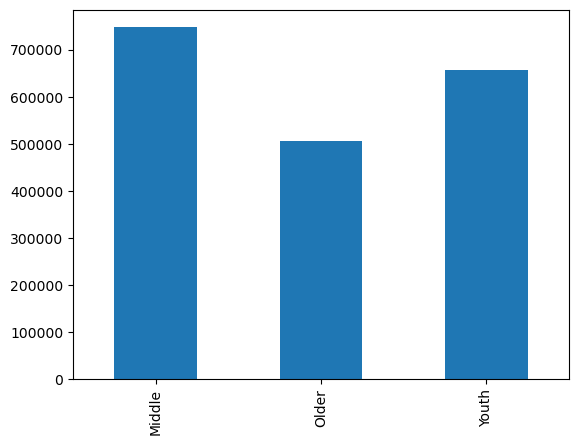

In [141]:
bar_Ncustomer_Age_category = Ncustomer['Age_category'].value_counts().sort_index().plot.bar()

##. There are more middle age customer in my datasets compare to older and youth ages.

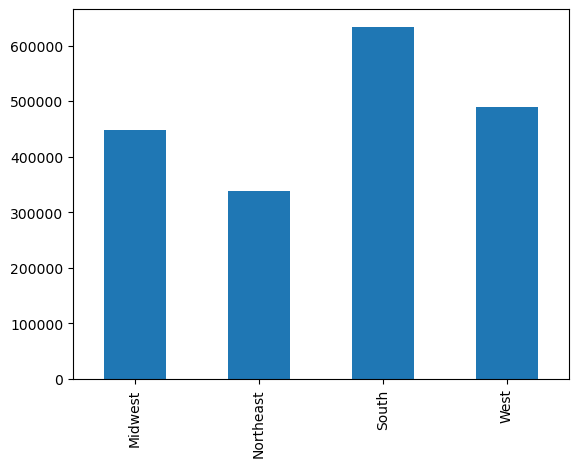

In [145]:
# exporting bar chart region as .png
bar_Ncustomer_region = Ncustomer['region'].value_counts().sort_index().plot.bar()

##. There are more customers from the south followed by west than the midwest and the northeast in my datasets.

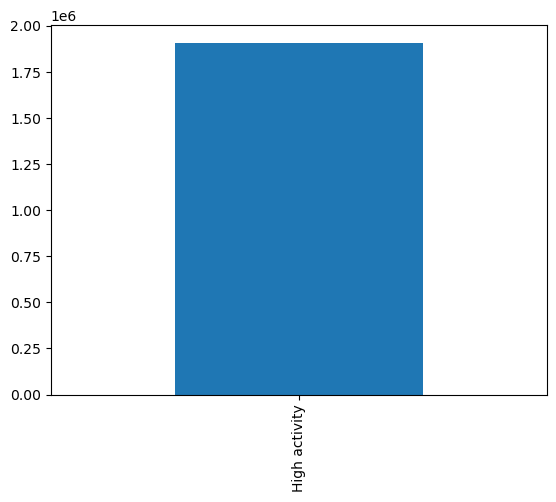

In [146]:
# exporting bar chart activity_flag as .png
bar_Ncustomer_activity_flag = Ncustomer['activity_flag'].value_counts().sort_index().plot.bar()

##. The charts show all my customers are active shoppers.

In [172]:
Ncustomer.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge',
       'eval_set', 'Busiest day', 'Busiest days', 'busiest_period_of_day',
       'max_order', 'loyalty_flag', 'max_price', 'average_price',
       'spending_flag', 'order_freq', 'order_freq_flag', 'Gender', 'State',
       'Age', 'date_joined', 'Number_Of_Dependents', 'Family_Status', 'income',
       'region', 'activity_flag', 'Age_category', 'family_size', 'household',
       'income_category', 'department', 'alcohol_drinker', 'parents_with_baby',
       'Products type', 'Products type'],
      dtype='object')

In [183]:
# Drawing a stacked-bar chart of 'Age category' column in different category of order_freq_flag
crosstab_AgeCat_OrderFreq = pd.crosstab (Ncustomer['Age_category'],Ncustomer['order_freq_flag'], dropna = False)

In [184]:
crosstab_AgeCat_OrderFreq.to_clipboard()

In [176]:
# checking the graph for a connection between family status and ordering habits?
crosstab_orderFreq_incomeCat = pd.crosstab (Ncustomer['order_freq_flag'],Ncustomer['income_category'], dropna = False)

In [178]:
crosstab_orderFreq_incomeCat.to_clipboard()

#  7. Customer profile aggregation for usage frequency and expenditure

In [185]:
# Department category expenditure aggregation
Ncustomer.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

Empty DataFrame
Columns: [(prices, mean), (prices, min), (prices, max)]
Index: []

In [186]:
# Age category usage frequency aggregation
Ncustomer.groupby('Age_category').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                          mean  min    max
Age_category                              
Middle                8.475248  1.0  131.0
Older                 8.429575  1.0   89.0
Youth                 8.567719  1.0   97.0

In [189]:
# Region expenditure aggregation by max_order
Ncustomer.groupby('region').agg({'max_order': ['mean', 'min', 'max']})

max_order           
                mean  min   max
region                         
Midwest    33.842197  5.0  99.0
Northeast  34.557966  5.0  99.0
South      34.129787  5.0  99.0
West       34.639323  5.0  99.0

In [190]:
# Region expenditure aggregation by price
Ncustomer.groupby('region').agg({'prices': ['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.868139  1.0  24.3
Northeast  7.842004  1.0  24.5
South      7.869522  1.0  24.5
West       7.855355  1.0  24.5

In [191]:
# Region usage frequency aggregation
Ncustomer.groupby('region').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                       mean  min    max
region                                 
Midwest            8.486319  1.0   99.0
Northeast          8.491952  1.0  130.0
South              8.519015  1.0  131.0
West               8.473819  1.0   97.0

In [192]:
# Household usage frequency aggregation
Ncustomer.groupby('household').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                                     mean  min    max
household                                            
Couple with children             8.504998  1.0  130.0
Couple without children          8.526786  1.0   97.0
One person                       8.524716  1.0  131.0
Other family                     8.411556  1.0   82.0

In [193]:
# household expenditure aggregation by price
Ncustomer.groupby('household').agg({'prices' : ['mean', 'min', 'max']})

prices           
                             mean  min   max
household                                   
Couple with children     7.855193  1.0  24.5
Couple without children  7.853250  1.0  24.5
One person               7.855656  1.0  24.5
Other family             7.892831  1.0  24.5

In [194]:
# Income category expenditure aggregation
Ncustomer.groupby('income_category').agg({'prices' : ['mean', 'min', 'max']})

prices           
                     mean  min   max
income_category                     
High             8.008227  1.0  24.3
Low              6.984208  1.0  24.5
Middle           7.940439  1.0  24.5
Upper mid        7.997339  1.0  24.5

In [195]:
# Income usage frequency aggregation
Ncustomer.groupby('income_category').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order            
                             mean  min    max
income_category                              
High                     8.591053  1.0   95.0
Low                      7.312614  1.0  131.0
Middle                   8.650041  1.0   97.0
Upper mid                8.657504  1.0  130.0

In [196]:
# Loyalty flag usage frequency aggregation
Ncustomer.groupby('loyalty_flag').agg({'add_to_cart_order': ['mean', 'min', 'max']})

add_to_cart_order            
                              mean  min    max
loyalty_flag                                  
Loyal customer            8.358787  1.0  131.0
New customer              8.484090  1.0   87.0
Regular customer          8.585173  1.0  130.0

In [197]:
# Loyalty flag expenditure aggregation
Ncustomer.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.825657  1.0  24.5
New customer      7.900731  1.0  24.5
Regular customer  7.870819  1.0  24.5

# Exporting my df_new_products as pickle file into my prepare data folder in the form of an image folder .png

In [199]:
path = r'C:\Users\Babafemi Olayinka\Jupyter Notebook\FEB-2023 INSTACART BASKET ANALYSIS'

In [200]:
path

'C:\\Users\\Babafemi Olayinka\\Jupyter Notebook\\FEB-2023 INSTACART BASKET ANALYSIS'

In [201]:
# export my Ncustomer as pkl format
Ncustomer.to_pickle(os.path.join(path, 'Data','Prepared Data', 'final_data_set_Ncustomer.pkl'))